<a href="https://colab.research.google.com/github/dona-nice/Deep-Learning/blob/master/FFDNN_Imple_Reduced_Features2_(LabelEncoder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FFDNN Keras implementation**

In [ ]:
# import relevant modules

import pandas as pd
import numpy as np
#import random as python_random
from tensorflow import random
np.random.seed(42)
random.set_seed(42)


from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import os


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



#**Load dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KDDTrain+.csv to KDDTrain+.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KDDTest+.csv to KDDTest+.csv


In [ ]:
# Import the loaded csv file into Pandas data frame


# Dataset field names

datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

df_NLSKDDTrain = pd.read_csv('KDDTrain+.csv', names=datacols) 

df_NLSKDDTrain = df_NLSKDDTrain.iloc[:,:-1]

#print(f"The Data type = \n\n{df_NLSKDD.dtypes}\n\n")


#print(f"Shape of NLSKDD Dataset: {df_NLSKDD.shape}\n\n")

#df_NLSKDD.head()

# Load NSL_KDD test dataset

df_NLSKDDTest = pd.read_csv('KDDTest+.csv', names=datacols) 

df_NLSKDDTest = df_NLSKDDTest.iloc[:,:-1]

**Train Data**

In [ ]:
#print(f"The Data type = \n\n{df_NLSKDD.dtypes}\n\n")

#print(f"Shape of NLSKDD Dataset: {df_NLSKDD.shape}\n\n")


# train set dimension
print('Train set dimension: {} rows, {} columns'.format(df_NLSKDDTrain.shape[0], df_NLSKDDTrain.shape[1]))

#View Train data

df_NLSKDDTrain.head(5)

Train set dimension: 125973 rows, 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
#Check columns with no values
#df_NLSKDD.isna().sum()

In [ ]:
#Check for missing  values
#df_NLSKDD.isnull().values.any()

In [ ]:
#df_NLSKDD = df_NLSKDD.drop('last_flag', axis = 'columns')




**Test Data**

In [ ]:
#print(f"The Data type = \n\n{df_NLSKDDTest.dtypes}\n\n")

#print(f"Shape of NLSKDDTest Dataset: {df_NLSKDDTest.shape}\n\n")



# test set dimension
print('Test set dimension: {} rows, {} columns'.format(df_NLSKDDTest.shape[0], df_NLSKDDTest.shape[1]))

#View Test data

df_NLSKDDTest.head(5)

Test set dimension: 22544 rows, 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


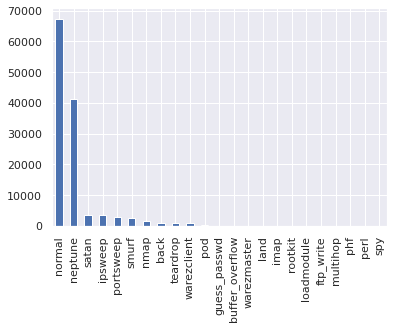

In [ ]:
#Understand the data 
#sns.countplot(x="attack", data=df_NLSKDD) #N - Normal   A - Anomaly

df_NLSKDDTrain['attack'].value_counts().plot(kind='bar')

In [ ]:
# Group the various attacks and Non attack type
df_NLSKDDTrain.groupby(['attack']).count()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
attack,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
back,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956
buffer_overflow,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
ftp_write,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
guess_passwd,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
imap,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
ipsweep,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599
land,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
loadmodule,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
multihop,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [ ]:
# Show all attacks and non attacks
df_NLSKDDTrain['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [ ]:
##Split data into train and test to verify accuracy after fitting the model. 
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
#Convert all non-normal observations into a single class:
def attack_anomalous(text):
    #"""Binarize target labels into normal or anomalous."""
    if text == "normal":
         return 0
    else:
         return 1

df_NLSKDDTrain["attack"] = df_NLSKDDTrain["attack"].apply(attack_anomalous)
df_NLSKDDTest["attack"] = df_NLSKDDTest["attack"].apply(attack_anomalous)



#df_NLSKDD["attack"].head()
df_NLSKDDTrain.head(5)



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [ ]:
df_NLSKDDTest.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1


In [ ]:
print(df_NLSKDDTrain.shape)
print(df_NLSKDDTest.shape)

(125973, 42)
(22544, 42)


In [ ]:
df_NLSKDDTrain['attack'].value_counts()

0    67343
1    58630
Name: attack, dtype: int64

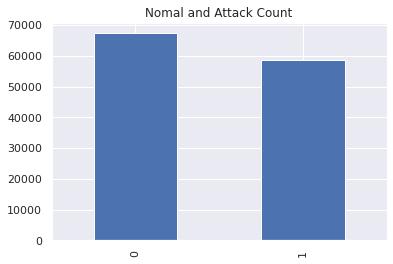

In [ ]:
##To plot single histogram based on single value
#df['attack'].plot(kind='hist', title='Attack Count')
#df_NLSKDD['attack'].plot(kind='hist', title='Attack Count', bins=10, figsize=(8,6)) #Can also add bins and fig size

df_NLSKDDTrain['attack'].value_counts().plot(kind='bar', title='Nomal and Attack Count')

In [ ]:
#df_NLSKDD['attack'].column


In [ ]:
#Drop the class attribute "attack"

#df_NLSKDD = df_NLSKDD.drop('attack', axis = 'columns')

#df_NLSKDD.head()



**Data Pre-processing**

**Using LabelEncoder from Scikitlearn to implement onehot coding for categorical features**


In [ ]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import Normalizer


for col in df_NLSKDDTrain.columns:
    if df_NLSKDDTrain[col].dtype == "object":
      encoded = LabelEncoder()
      encoded.fit(df_NLSKDDTrain[col])
      df_NLSKDDTrain[col] = encoded.transform(df_NLSKDDTrain[col])


print(df_NLSKDDTrain.shape)
#print(df_test.shape)

(125973, 42)


In [ ]:
df_NLSKDDTrain.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,1,20,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [ ]:
for col in df_NLSKDDTest.columns:
    if df_NLSKDDTest[col].dtype == "object":
      encoded = LabelEncoder()
      encoded.fit(df_NLSKDDTest[col])
      df_NLSKDDTest[col] = encoded.transform(df_NLSKDDTest[col])


print(df_NLSKDDTest.shape)

(22544, 42)


In [ ]:
df_NLSKDDTest.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,1,19,9,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,0,13,9,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1
4,1,1,55,2,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1


In [ ]:
train_labels = df_NLSKDDTrain["attack"].values

train_samples = df_NLSKDDTrain.drop(labels=['attack'], axis=1)


In [ ]:
test_labels = df_NLSKDDTest["attack"].values

test_samples = df_NLSKDDTest.drop(labels=['attack'], axis=1)

In [ ]:
#from sklearn.feature_selection import RFE
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier()
#rfe = RFE(estimator = model, n_features_to_select = 15)
#fit = rfe.fit(train_samples, train_labels)

In [ ]:
#print("Num Features: %d" %fit.n_features_)
#print("Selected Features: %s" %fit.support_)
#print("Feature ranking: %s" %fit.ranking_)


In [ ]:
#feature_names = (train_samples.columns).values


#print(feature_names[fit.support_])

**Create dataframe for the selected features**

In [ ]:
#Feature_selection_cols = ['protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes' 'hot' 'count'
# 'srv_count' 'same_srv_rate' 'diff_srv_rate' 'dst_host_srv_count'
 #'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 #'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate']


#df_selected_feat = train_samples[Feature_selection_cols]

#df_selected_featTest = test_samples[Feature_selection_cols]

In [ ]:
#df_selected_feat.head(10)

In [ ]:
#df_selected_feat.shape

**Process the data by passing data as numpy array and then normalize the data**

In [ ]:
#Convert dataframe into an array
train_labels = df_NLSKDDTrain["attack"].values

train_samples = df_NLSKDDTrain.drop(labels=['attack'], axis=1)


test_labels = df_NLSKDDTest["attack"].values

test_samples = df_NLSKDDTest.drop(labels=['attack'], axis=1)



print(train_samples.shape)
print(train_labels.shape)
#print(train_labels)

print(test_samples.shape)
print(test_labels.shape)

(125973, 41)
(125973,)
(22544, 41)
(22544,)


In [ ]:
print(train_labels)

[0 0 1 ... 0 1 0]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators = 300).fit(train_samples, train_labels)

In [ ]:
rf.feature_importances_

array([2.99723856e-03, 3.47164634e-02, 2.68560926e-02, 9.16007833e-02,
       1.97735364e-01, 1.01060732e-01, 2.33605800e-05, 4.35552758e-03,
       1.41757993e-05, 8.93731401e-03, 1.64489914e-04, 4.24757200e-02,
       5.81016712e-03, 5.96085866e-05, 1.20244806e-05, 1.44228611e-04,
       9.52947077e-05, 3.41205805e-05, 2.35480209e-05, 0.00000000e+00,
       0.00000000e+00, 7.78280522e-04, 2.82109631e-02, 1.70706995e-02,
       1.52029818e-02, 1.90615540e-02, 4.42660675e-03, 5.10297170e-03,
       8.93793130e-02, 5.00741492e-02, 2.17071960e-03, 1.59243852e-02,
       4.44116822e-02, 7.09949627e-02, 3.51691280e-02, 2.52323207e-02,
       1.93283375e-02, 1.24521255e-02, 1.11944603e-02, 9.47106842e-03,
       7.22703613e-03])

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_, index =train_samples.columns,  columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
src_bytes,0.197735
dst_bytes,0.101061
flag,0.091601
same_srv_rate,0.089379
dst_host_same_srv_rate,0.070995
diff_srv_rate,0.050074
dst_host_srv_count,0.044412
logged_in,0.042476
dst_host_diff_srv_rate,0.035169
protocol_type,0.034716


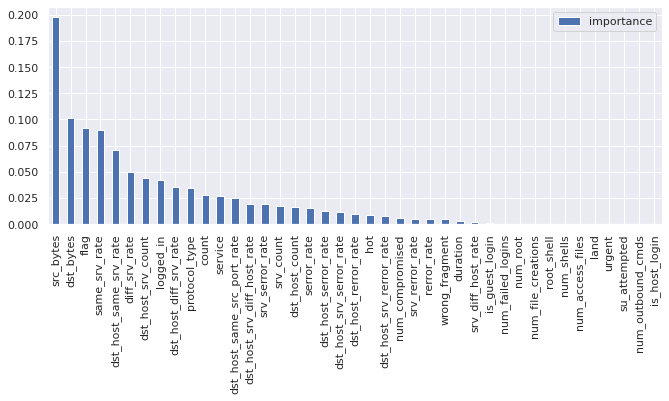

In [ ]:
plt.rcParams['figure.figsize'] = (11, 4)
feature_importances.plot(kind='bar');

In [ ]:
# create the RFE model and select 10 attributes
from sklearn.feature_selection import RFE
import itertools

rf = RFE(rf, n_features_to_select=15)
rf = rf.fit(train_samples, train_labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


#rf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators = 300).fit(train_samples, train_labels)

sel = SelectFromModel(RandomForestClassifier(n_estimators = 300))
sel.fit(train_samples, train_labels)



#rfc = RandomForestClassifier();

#refclasscol = df_NLSKDD.columns
# fit random forest classifier on the training set
#rfc.fit(train_samples, train_labels);
# extract important features
#score = np.round(rfc.feature_importances_,3)
#importances = pd.DataFrame({'feature':refclasscol,'importance':score})
#importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
#plt.rcParams['figure.figsize'] = (11, 4)
#importances.plot.bar();

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=300, n_jobs=None,
                                                 oob_score=False,

**Get features that are important **

In [ ]:
sel.get_support()

array([False,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False])

**Make a list and count the selected features**

In [ ]:
selected_feat= train_samples.columns[(sel.get_support())]
len(selected_feat)

13

**Get the name of the features selected**

In [ ]:
print(selected_feat)

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate'],
      dtype='object')


**Create dataframe for the selected features**

In [ ]:
Feature_selection_cols = ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate']

df_selected_feat = train_samples[Feature_selection_cols]

df_selected_featTest = test_samples[Feature_selection_cols]

df_selected_feat.head(10)


,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate
0,1,20,9,491,0,0,2,1.00,0.00,25,0.17,0.03,0.17
1,2,44,9,146,0,0,13,0.08,0.15,1,0.00,0.60,0.88
2,1,49,5,0,0,0,123,0.05,0.07,26,0.10,0.05,0.00
3,1,24,9,232,8153,1,5,1.00,0.00,255,1.00,0.00,0.03
4,1,24,9,199,420,1,30,1.00,0.00,255,1.00,0.00,0.00
5,1,49,1,0,0,0,121,0.16,0.06,19,0.07,0.07,0.00
6,1,49,5,0,0,0,166,0.05,0.06,9,0.04,0.05,0.00
7,1,49,5,0,0,0,117,0.14,0.06,15,0.06,0.07,0.00
8,1,51,5,0,0,0,270,0.09,0.05,23,0.09,0.05,0.00
9,1,49,5,0,0,0,133,0.06,0.06,13,0.05,0.06,0.00


In [ ]:
df_selected_feat.shape

(125973, 13)

In [ ]:
df_selected_featTest.head(10)


,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate
0,1,45,1,0,0,0,229,0.04,0.06,10,0.04,0.06,0.00
1,1,45,1,0,0,0,136,0.01,0.06,1,0.00,0.06,0.00
2,1,19,9,12983,0,0,1,1.00,0.00,86,0.61,0.04,0.61
3,0,13,9,20,0,0,1,1.00,0.00,57,1.00,0.00,1.00
4,1,55,2,0,15,0,1,1.00,0.00,86,0.31,0.17,0.03
5,1,22,9,267,14515,1,4,1.00,0.00,255,1.00,0.00,0.01
6,1,49,9,1022,387,1,1,1.00,0.00,28,0.11,0.72,0.00
7,1,55,9,129,174,0,1,1.00,0.00,255,1.00,0.00,0.00
8,1,22,9,327,467,1,33,1.00,0.00,255,1.00,0.00,0.01
9,1,18,9,26,157,0,1,1.00,0.00,26,0.50,0.08,0.02


In [ ]:
df_selected_featTest.shape

(22544, 13)

**Plot the distribution of importance**

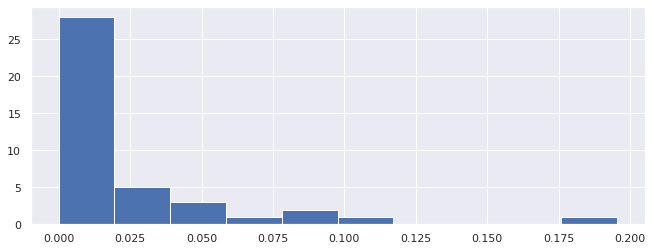

In [ ]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

**Plotting Feature importance**

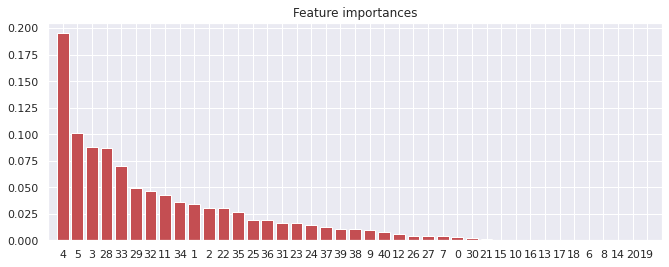

In [ ]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# train_samples is the train data used to fit the model 
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_samples.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(train_samples.shape[1]), indices)
plt.xlim([-1, train_samples.shape[1]])
plt.rcParams['figure.figsize'] = (14, 10)
plt.show()

In [ ]:
#feature_importances = pd.DataFrame(sel.estimator_.feature_importances_, index =sel.columns,  columns=['importance']).sort_values('importance', ascending=False)

In [ ]:
#feature_importances = pd.DataFrame(rf.feature_importances_, index =rf.columns,  columns=['importance']).sort_values('importance', ascending=False)

In [ ]:
#X_train1=np.array(df_selected_feat)

#X_test=np.array(df_selected_featTest)


In [ ]:
#Convert dataframe into an array
train_labels = df_NLSKDDTrain["attack"].values

train_samples2 = np.array(df_selected_feat)


test_labels = df_NLSKDDTest["attack"].values

test_samples2 = np.array(df_selected_featTest)



print(train_samples2.shape)
print(train_labels.shape)
#print(train_labels)

print(test_samples2.shape)
print(test_labels.shape)

(125973, 13)
(125973,)
(22544, 13)
(22544,)


***Feature Scaling***

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(train_samples2)
train_samples_New = scaler.transform(train_samples2)

#scaled_train_samples = scaler.fit_transform(train_samples)
#scaled_train_samples = scaler.transform

#scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))

scaler.fit(test_samples2)
test_samples_New = scaler.transform(test_samples2)


train_samples_New



array([[0.5       , 0.28985507, 0.9       , ..., 0.17      , 0.03      ,
        0.17      ],
       [1.        , 0.63768116, 0.9       , ..., 0.        , 0.6       ,
        0.88      ],
       [0.5       , 0.71014493, 0.5       , ..., 0.1       , 0.05      ,
        0.        ],
       ...,
       [0.5       , 0.7826087 , 0.9       , ..., 0.12      , 0.06      ,
        0.        ],
       [0.5       , 0.43478261, 0.5       , ..., 0.03      , 0.05      ,
        0.        ],
       [0.5       , 0.28985507, 0.9       , ..., 0.3       , 0.03      ,
        0.3       ]])

In [ ]:
print(test_samples_New)

[[0.5        0.71428571 0.1        ... 0.04       0.06       0.        ]
 [0.5        0.71428571 0.1        ... 0.         0.06       0.        ]
 [0.5        0.3015873  0.9        ... 0.61       0.04       0.61      ]
 ...
 [0.5        0.34920635 0.9        ... 1.         0.         0.        ]
 [1.         0.17460317 0.9        ... 0.99       0.01       0.        ]
 [0.5        0.82539683 0.1        ... 0.08       0.03       0.        ]]


In [ ]:
print(train_samples_New.shape)

print(train_labels.shape)

(125973, 13)
(125973,)


In [ ]:
print(test_samples_New.shape)

print(test_labels.shape)

(22544, 13)
(22544,)


In [ ]:
# Split data into train and test to verify accuracy after fitting the model

X_train, X_val, y_train, y_val = train_test_split(train_samples_New, train_labels, test_size = 0.2, random_state = 42)

In [ ]:
#train_labels = np.array(df_NLSKDD.attack)
#train_samples = np.array(train_samples)

#train_labels, train_samples = shuffle(train_labels, train_samples)

**tf.keras sequential model**

**Create Artificial Neural Network using a sequential model from keras API integrated into tensorflow **

In [ ]:
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation
#from keras.optimizers import SGD
#from sklearn.metrics import mean_squared_error

#Load the TensorBoard notebook extension
#%load_ext tensorboard
import datetime
#from keras.callbacks import TensorBoard
#from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, TensorBoard
from keras.callbacks import EarlyStopping

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.metrics import categorical_crossentropy


#Some extra settings for some fancy visualization.
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
#Defined the early stopping callback

#es_callback = EarlyStopping(monitor='val_loss', mode='min')
  #patience=10)

In [ ]:


#model = Sequential([Dense(units=8, input_shape=(118,) , activation="relu"),
 #                   Dense(units=16, activation="relu"),
  #                  Dense(units=1, activation="softmax")]) 

model = Sequential()
model.add(Dense(32, input_dim = 13, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
  

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                448       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_4 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_5 (Activation)    (None, 1)                

**Create the model compiler and then train the network**

In [ ]:
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [ ]:
#model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

**Create Validation set**

In [ ]:
#history = model.fit(x=train_samples, y=train_labels, validation_split=0.2, batch_size=10, epochs=20, shuffle=True, verbose=2)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=64, verbose=1, shuffle=False)

results = model.evaluate(X_val, y_val)

Epoch 1/40
1575/1575 [==============================] - 5s 3ms/step - loss: 0.1817 - accuracy: 0.9377 - val_loss: 0.1102 - val_accuracy: 0.9655
Epoch 2/40
1575/1575 [==============================] - 4s 3ms/step - loss: 0.1140 - accuracy: 0.9659 - val_loss: 0.0942 - val_accuracy: 0.9711
Epoch 3/40
1575/1575 [==============================] - 4s 3ms/step - loss: 0.1013 - accuracy: 0.9687 - val_loss: 0.0860 - val_accuracy: 0.9688
Epoch 4/40
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0926 - accuracy: 0.9706 - val_loss: 0.0801 - val_accuracy: 0.9736
Epoch 5/40
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0855 - accuracy: 0.9721 - val_loss: 0.0756 - val_accuracy: 0.9739
Epoch 6/40
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0818 - accuracy: 0.9735 - val_loss: 0.0713 - val_accuracy: 0.9754
Epoch 7/40
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0778 - accuracy: 0.9740 - val_loss: 0.0681 - val_accuracy:

In [ ]:
score = model.evaluate(X_val,y_val)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

788/788 [==============================] - 1s 2ms/step - loss: 0.0544 - accuracy: 0.9796
Val loss: 0.05438480153679848
Val accuracy: 0.9796388149261475


In [ ]:
print('Summary of the result after each epoch:')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the result after each epoch:


,loss,accuracy,val_loss,val_accuracy,epoch
35,0.060527,0.978616,0.054156,0.979639,35
36,0.060024,0.978557,0.054895,0.979083,36
37,0.059681,0.978587,0.055686,0.978647,37
38,0.060698,0.978795,0.054479,0.979163,38
39,0.060147,0.978696,0.054385,0.979639,39


In [ ]:
#print('Summary of the results after each epochs:')
#hist = pd.df_NLSKDD(history.history)
#hist['epoch'] = history.epoch
#hist.tail()

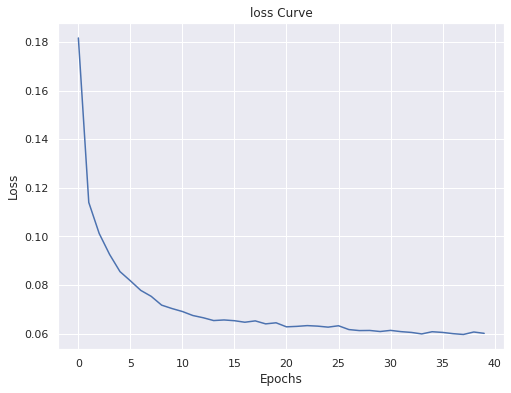

In [ ]:
loss = history.history['loss']

fig = plt.figure(figsize=(8, 6))
plt.title('loss Curve')
plt.xlabel("Epochs")
plt.ylabel("Loss")


plt.plot(loss)
plt.show()

In [ ]:
#results = model.evaluate(x_test, y_test)

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

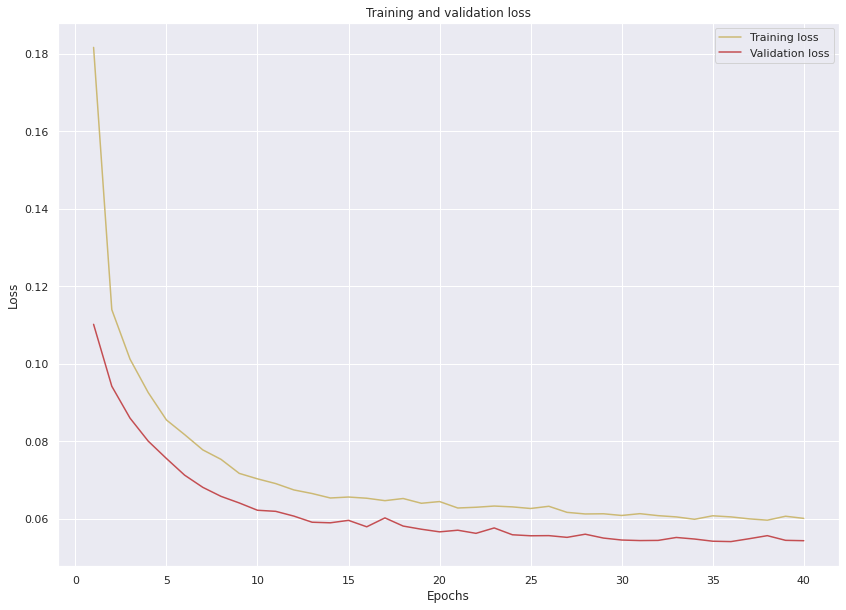

In [ ]:
#Matplotlib to plot the training and validation loss:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
#loss = history.history['loss']
#val_loss = history.history['val_loss']

#epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
#plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.title('Training and validation loss')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()

#plt.show()

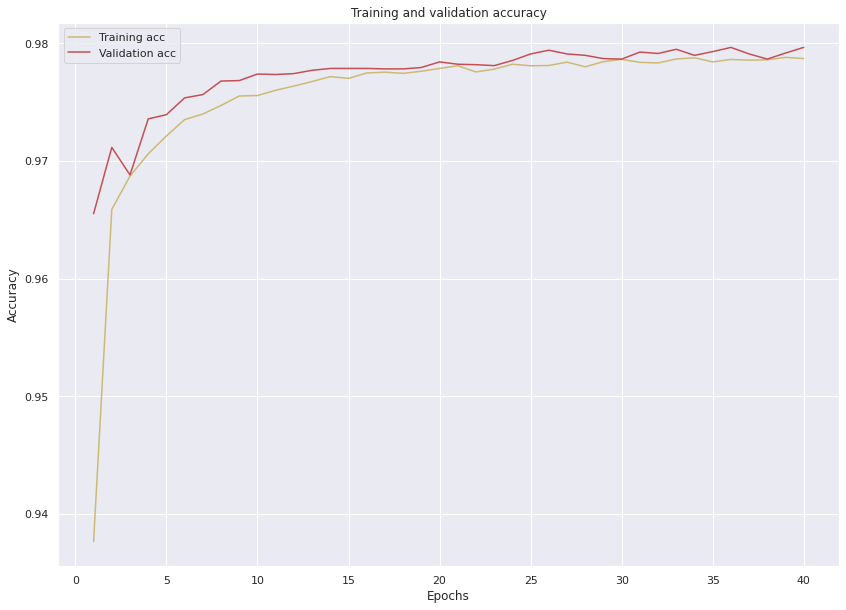

Best Accuracy on training set =  97.87949919700623
Best Accuracy on val set =  97.96388149261475


In [ ]:
#Matplotlib to plot the training and validation accuracy:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# print the best accuracy reached on training set and the test set
print("Best Accuracy on training set = ", max(history.history['accuracy'])*100)
print("Best Accuracy on val set = ", max(history.history['val_accuracy'])*100)

#acc_values = history_dict['accuracy']
#val_acc_values = history_dict['val_accuracy']

#plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()

#plt.show()

In [ ]:
# Predicting the Test set results
y_pred = model.predict(test_samples_New)
y_pred = (y_pred > 0.005874)

TP - True Negative 7344
FP - False Positive 2367
FN - False Negative 3118
TP - True Positive 9715
Accuracy Rate: 0.7566980127750177
Misclassification Rate: 0.24330198722498225
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      9711
           1       0.80      0.76      0.78     12833

    accuracy                           0.76     22544
   macro avg       0.75      0.76      0.75     22544
weighted avg       0.76      0.76      0.76     22544



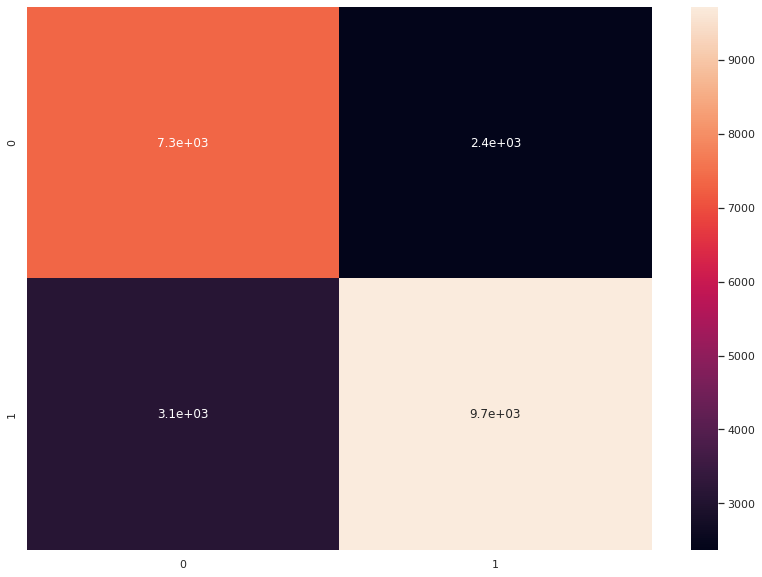

In [ ]:

# making the Confusion matrix
cm = confusion_matrix(test_labels, y_pred)

sns.heatmap(cm, annot = True)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

print(classification_report(test_labels, y_pred))

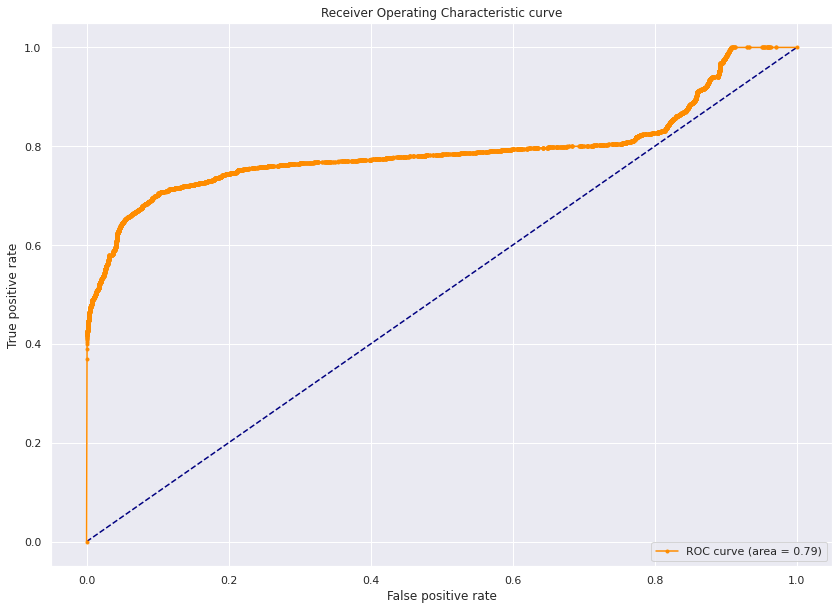

In [ ]:
#ROC can help identify the right threshold.
##################################################################
"""
Receiver Operating Characteristic (ROC) Curve is a plot that helps us 
visualize the performance of a binary classifier when the threshold is varied. 
"""
#ROC

y_preds = model.predict(test_samples_New).ravel()


fpr, tpr, thresholds = roc_curve(test_labels, y_preds)
auc_value = auc(fpr, tpr)

plt.figure(1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr, tpr,  color='darkorange', marker='.', label='ROC curve (area = %0.2f)'% auc_value)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  2496    0.005874
Name: thresholds, dtype: float32


In [ ]:
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.8566931070181819


In [ ]:
cm = confusion_matrix(test_labels, y_pred)

In [ ]:
import itertools
import math

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="confusion matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting "normalize=True".
  """
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
      print("Normalized confusion matrix")
    
  else:
      print("confusion matrix, without normalization")

  print(cm)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i,j],
               horizontalalignment="center",
               color="white" if cm[i,j]>thresh else "black")
      
      plt.tight_layout()
      plt.ylabel("True label")
      plt.xlabel("Predicted label")


confusion matrix, without normalization
[[ 8151  1560]
 [ 2062 10771]]


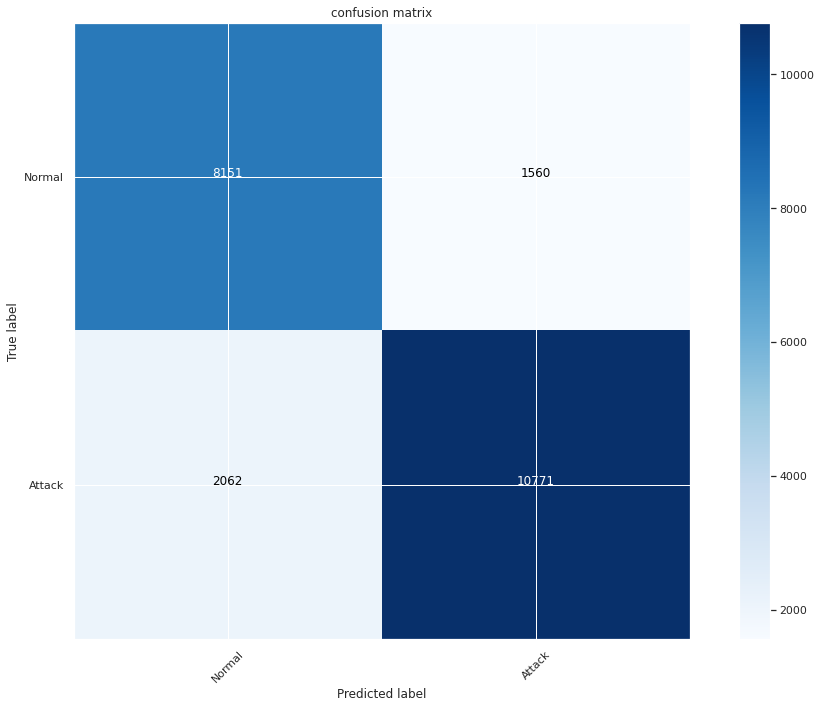

In [ ]:
cm_plot_labels = ["Normal", "Attack"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="confusion matrix")
